# STAGE-3

Stage 3 - Perform following tasks on processed data

Problem A - Generate word cloud

Problem B - Create inverted index for hashtags, mentions and words appearing in the tweets

Problem C - Perform Sentiment Analysis and publish distribution by place


In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('stage_3.csv')             #reading csv data which is stored in stage-2
df.head()

,Unnamed: 0,transformed_text
0,0,teen suspect wanted shooting death temple univ...
1,1,sharing happy news girl found guruvayur thanks...
2,2,greatest hits read watch highlights website
3,3,major news lemniscate amp savior 20 game gift ...
4,4,looking time news reporters channels totally a...


In [3]:
df = df[['transformed_text']]

In [4]:
df

,transformed_text
0,teen suspect wanted shooting death temple univ...
1,sharing happy news girl found guruvayur thanks...
2,greatest hits read watch highlights website
3,major news lemniscate amp savior 20 game gift ...
4,looking time news reporters channels totally a...
...,...
995,scoop morning told attendee drinks 10 dec 18th
996,felt raw weeks news utterly heart wrenching ev...
997,bad news travels fast travelfail fallontonight
998,devastating news distinguished creative soul f...


In [5]:
a = df.astype(str).values.tolist()

In [6]:
flat_list = [item for sublist in a for item in sublist]

In [7]:
b=str(flat_list)

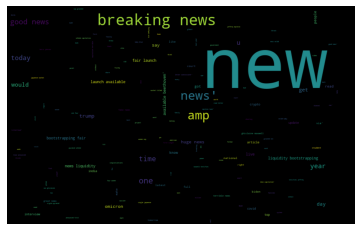

In [11]:
---------#Bonus Question-----------

## Simple WordCloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 

text = b

def generate_wordcloud(text): # optionally add: stopwords=STOPWORDS and change the arg below
    wordcloud = WordCloud(
                          width=800, height=500,
                          relative_scaling = 1.0,
                          stopwords = {'to', 'of'} # set or space-separated string
                          ).generate(text)
    
    fig = plt.figure(1, figsize=(8, 4))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.axis("off")
    ## Pick One:
    # plt.show()
    plt.savefig("WordCloud.png")

generate_wordcloud(text)

Problem A - Generate word cloud

In [6]:
df["mytext_new"] = df['transformed_text'].str.lower().str.replace('[^\w\s]','')
 
new_df = df.mytext_new.str.split(expand=True).stack().value_counts().reset_index()
 
new_df.columns = ['Word', 'Frequency'] 
 
new_df

C:\Users\yloke\AppData\Local\Temp/ipykernel_56332/2649999667.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["mytext_new"] = df['transformed_text'].str.lower().str.replace('[^\w\s]','')


,Word,Frequency
0,news,369
1,new,63
2,breaking,56
3,amp,40
4,good,39
...,...,...
4073,ravine,1
4074,spite,1
4075,levels,1
4076,postponed,1


In [8]:
new_df.shape

(4078, 2)

# Stage-3(C)

Problem C - Sentiment Analysis and its distribution by place

In [35]:
import tweepy
from tweepy import OAuthHandler
import json
import ndjson
import os
import datetime

# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [38]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\yloke\AppData\Roaming\nltk_data...


True

In [36]:
# Authenticate to Twitter
access_token = '1399060365699280899-Bhj3sxug8aMaYI2VlaQJ3bq7YWSCgP'
access_token_secret = 'FulI9A5S7S4WMRwfESGwy9VjbKnrBt6yRH1nsLrEA7oCw'
consumer_key = '1PtTnvyog1efrVGqDvTjA8LgC'
consumer_secret = 'J0gGFeL0q1LizyboxS0Si6CMCoxdgNMq3OhylFCOaBex7P3lEK'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

try:
    api.verify_credentials()
    print("Authentication OK")
except:
    print("Error during authentication")

Authentication OK


In [57]:
#Sentiment Analysis
def percentage(part,whole):
    return 100 * float(part)/float(whole)

keyword = str(input('Please enter keyword or hashtag to search: '))
noOfTweet = int(input ('Please enter how many tweets to analyze: '))
tweets = tweepy.Cursor(api.search_tweets, q=keyword, lang='en').items(noOfTweet)

positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
for tweet in tweets:
 
 #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
 
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1
    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
 
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: article 370
Please enter how many tweets to analyze: 1000


In [58]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print('total number: ',len(tweet_list))
print('positive number: ',len(positive_list))
print('negative number: ', len(negative_list))
print('neutral number: ',len(neutral_list))

total number:  1000
positive number:  208
negative number:  568
neutral number:  224


In [59]:
tweet_list

,0
0,RT @PiyushGoyalOffc: Terror violence in J&amp;...
1,RT @PiyushGoyalOffc: Terror violence in J&amp;...
2,RT @PiyushGoyalOffc: Terror violence in J&amp;...
3,RT @GowharGeelani: Party X: Article 370 will b...
4,RT @Newsbox_India: Congress can never win 300 ...
...,...
995,RT @TameelirshadAge: BJP took advantage of ‘we...
996,"RT @TameelirshadAge: For normalcy in J&amp;K, ..."
997,"RT @mvmeet: ""If normalcy is to be brought in K..."
998,Those who are asking article 370 ke hatne se k...


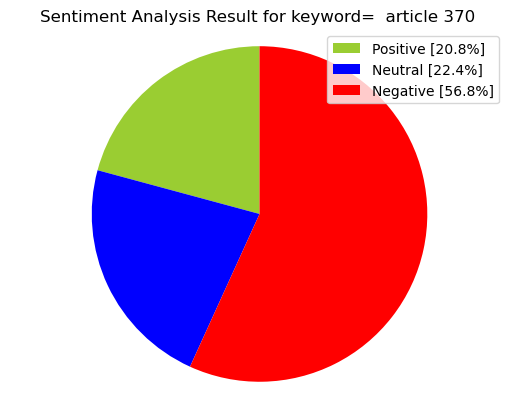

In [60]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [61]:
tweet_list.drop_duplicates(inplace = True)


In [63]:
tweet_list

,0
0,RT @PiyushGoyalOffc: Terror violence in J&amp;...
3,RT @GowharGeelani: Party X: Article 370 will b...
4,RT @Newsbox_India: Congress can never win 300 ...
5,Not sure if Congress can get 300 seats in 2024...
6,Terror violence in J&amp;K down by 41% post-Ar...
...,...
993,@KavinderGupta slammed National Conference Chi...
994,"#JammuAndKashmir: 1,678 #KashmiriMigrants retu..."
995,RT @TameelirshadAge: BJP took advantage of ‘we...
996,"RT @TameelirshadAge: For normalcy in J&amp;K, ..."


In [64]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,RT @PiyushGoyalOffc: Terror violence in J&amp;...,terror violence in j amp k down by 41 post a...
3,RT @GowharGeelani: Party X: Article 370 will b...,party x article 370 will be restored either ...
4,RT @Newsbox_India: Congress can never win 300 ...,congress can never win 300 seats and restore ...
5,Not sure if Congress can get 300 seats in 2024...,not sure if congress can get 300 seats in 2024...
6,Terror violence in J&amp;K down by 41% post-Ar...,terror violence in j amp k down by 41 post ar...
7,#Modi4PM2024\nTerror violence in J&amp;K down ...,modi4pm2024 terror violence in j amp k down b...
8,Terror violence in J&amp;K down by 41% post-Ar...,terror violence in j amp k down by 41 post ar...
9,RT @BJPLive: Terror violence in J&amp;K down b...,terror violence in j amp k down by 41 post a...
11,RT @knowthenation: Revoking Article 370 has wo...,revoking article 370 has worked article370...
12,RT @NiranjanZazmera: Terror violence in J&amp;...,terror violence in j amp k down by 41 post a...


In [65]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @PiyushGoyalOffc: Terror violence in J&amp;...,terror violence in j amp k down by 41 post a...,-0.155556,0.288889,negative,0.405,0.595,0.000,-0.8176
3,RT @GowharGeelani: Party X: Article 370 will b...,party x article 370 will be restored either ...,0.000000,0.000000,positive,0.090,0.517,0.393,0.8316
4,RT @Newsbox_India: Congress can never win 300 ...,congress can never win 300 seats and restore ...,-0.400000,0.400000,negative,0.189,0.676,0.135,-0.2197
5,Not sure if Congress can get 300 seats in 2024...,not sure if congress can get 300 seats in 2024...,-0.250000,0.888889,positive,0.089,0.812,0.099,0.0613
6,Terror violence in J&amp;K down by 41% post-Ar...,terror violence in j amp k down by 41 post ar...,-0.155556,0.288889,negative,0.405,0.595,0.000,-0.8176
7,#Modi4PM2024\nTerror violence in J&amp;K down ...,modi4pm2024 terror violence in j amp k down b...,-0.155556,0.288889,negative,0.385,0.615,0.000,-0.8176
8,Terror violence in J&amp;K down by 41% post-Ar...,terror violence in j amp k down by 41 post ar...,-0.155556,0.288889,negative,0.405,0.595,0.000,-0.8176
9,RT @BJPLive: Terror violence in J&amp;K down b...,terror violence in j amp k down by 41 post a...,-0.155556,0.288889,negative,0.455,0.545,0.000,-0.8176
11,RT @knowthenation: Revoking Article 370 has wo...,revoking article 370 has worked article370...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
12,RT @NiranjanZazmera: Terror violence in J&amp;...,terror violence in j amp k down by 41 post a...,-0.155556,0.288889,negative,0.405,0.595,0.000,-0.8176


In [66]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [67]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [68]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
negative,223,54.66
positive,102,25.00
neutral,83,20.34


In [71]:
#Function to Create Wordcloud

def create_wordcloud(text):
    #mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


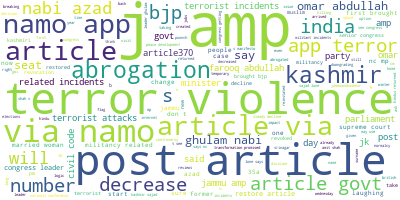

In [72]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

In [73]:
#Removing Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

In [74]:
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

In [75]:
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

In [76]:
#Appliyng Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

In [77]:
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [78]:
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,punct,tokenized,nonstop,stemmed
0,RT @PiyushGoyalOffc: Terror violence in J&amp;...,terror violence in j amp k down by 41 post a...,-0.155556,0.288889,negative,0.405,0.595,0.000,-0.8176,terror violence in j amp k down by post art...,"[, terror, violence, in, j, amp, k, down, by, ...","[, terror, violence, j, amp, k, post, article,...","[, terror, violenc, j, amp, k, post, articl, v..."
3,RT @GowharGeelani: Party X: Article 370 will b...,party x article 370 will be restored either ...,0.000000,0.000000,positive,0.090,0.517,0.393,0.8316,party x article will be restored either by ...,"[, party, x, article, will, be, restored, eith...","[, party, x, article, restored, either, india,...","[, parti, x, articl, restor, either, india, pa..."
4,RT @Newsbox_India: Congress can never win 300 ...,congress can never win 300 seats and restore ...,-0.400000,0.400000,negative,0.189,0.676,0.135,-0.2197,congress can never win seats and restore art...,"[, congress, can, never, win, seats, and, rest...","[, congress, never, win, seats, restore, artic...","[, congress, never, win, seat, restor, articl,..."
5,Not sure if Congress can get 300 seats in 2024...,not sure if congress can get 300 seats in 2024...,-0.250000,0.888889,positive,0.089,0.812,0.099,0.0613,not sure if congress can get seats in to res...,"[not, sure, if, congress, can, get, seats, in,...","[sure, congress, get, seats, restore, article,...","[sure, congress, get, seat, restor, articl, sa..."
6,Terror violence in J&amp;K down by 41% post-Ar...,terror violence in j amp k down by 41 post ar...,-0.155556,0.288889,negative,0.405,0.595,0.000,-0.8176,terror violence in j amp k down by post arti...,"[terror, violence, in, j, amp, k, down, by, po...","[terror, violence, j, amp, k, post, article, v...","[terror, violenc, j, amp, k, post, articl, via..."


In [79]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

408 Number of reviews has 873 words


In [80]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()


,,aa,aadesh,aaj,abdulla,abdullah,abhi,abolish,abolit,aborrog,...,worth,would,wri,wrong,x,yaha,ye,yea,year,yesterday
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
articl,329
amp,205
j,184
k,182
terror,134
post,131
violenc,125
via,92
namo,88
app,87


In [82]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [83]:
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)

n2_bigrams

[('article 370', 304),
 ('terror violence', 125),
 ('violence amp', 125),
 ('amp 41', 124),
 ('41 post', 123),
 ('post article', 123),
 ('namo app', 87),
 ('370 namo', 84),
 ('abrogation article', 61),
 ('amp abrogation', 26),
 ('decrease number', 26),
 ('370 govt', 26),
 ('nabi azad', 24),
 ('ghulam nabi', 21),
 ('incidents amp', 20),
 ('omar abdullah', 19),
 ('terrorist incidents', 16),
 ('number terrorist', 15),
 ('civil code', 15),
 ('300 seats', 13)]

In [84]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)

n3_trigrams

[('terror violence amp', 125),
 ('violence amp 41', 124),
 ('amp 41 post', 123),
 ('post article 370', 123),
 ('41 post article', 120),
 ('article 370 namo', 84),
 ('370 namo app', 83),
 ('abrogation article 370', 60),
 ('amp abrogation article', 26),
 ('article 370 govt', 26),
 ('ghulam nabi azad', 20),
 ('incidents amp abrogation', 18),
 ('decrease number terrorist', 14),
 ('number terrorist incidents', 14),
 ('article 370 says', 11),
 ('jammu amp kashmir', 11),
 ('restore article 370', 9),
 ('congress 300 seats', 9),
 ('300 seats 2024', 9),
 ('militancy related incidents', 9)]